In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Specifying the path of .csv files

In [2]:
md1_hybrid_hbonds = '/content/drive/My Drive/iGEM2020/Dry Lab Stuff/Human-protein-study/PfEMP1-5MZA--Ananth/MD-run/MD-hybrid/MD1/md1_hybrid_hbonds.csv'
md2_hybrid_hbonds = '/content/drive/My Drive/iGEM2020/Dry Lab Stuff/Human-protein-study/PfEMP1-5MZA--Ananth/MD-run/MD-hybrid/MD2/md2_hybrid_hbonds.csv'
md3_hybrid_hbonds = '/content/drive/My Drive/iGEM2020/Dry Lab Stuff/Human-protein-study/PfEMP1-5MZA--Ananth/MD-run/MD-hybrid/MD3/md3_hybrid_hbonds.csv'


md1_16ile_hbonds = '/content/drive/My Drive/iGEM2020/Dry Lab Stuff/Human-protein-study/PfEMP1-5MZA--Ananth/MD-run/MD-16ile/MD1/md1_16ile_hbonds.csv'
md2_16ile_hbonds = '/content/drive/My Drive/iGEM2020/Dry Lab Stuff/Human-protein-study/PfEMP1-5MZA--Ananth/MD-run/MD-16ile/MD2/md2_16ile_hbonds.csv'
md3_16ile_hbonds = '/content/drive/My Drive/iGEM2020/Dry Lab Stuff/Human-protein-study/PfEMP1-5MZA--Ananth/MD-run/MD-16ile/MD3/md3_16ile_hbonds.csv'

# Auxillary functions

In [3]:
def preprocessing_df(path):

    df = pd.read_csv(path)
    df.drop('Unnamed: 0',axis=1,inplace=True)
    df['DA_pair'] = df['Donor']+' | '+df['Acceptor']
    df['Timestep'] = df['Fname'].apply(lambda x : x.split('.')[0][3:])
    df['Timestep'] = df['Timestep'].apply(lambda x : str(x).zfill(3))
    df["Timestep"] = pd.to_numeric(df["Timestep"], downcast="float")
    df.sort_values('Timestep', inplace=True)
    df.drop('Fname',axis=1,inplace=True)

    cols = df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    df = df[cols]

    return df

def get_run_hbond_data(df,DA_pairs):
    counter_1,counter_2,counter_3,counter_4,counter_5,counter_6 = ([] for i in range(len(DA_pairs)))
    tgroup = df.groupby('Timestep')
    for i,j in tgroup:
        for k in j['DA_pair'] :
            
            if k == DA_pairs[0]:
                counter_1.append(int(i))

            elif k == DA_pairs[1]:
                counter_2.append(int(i))

            elif k == DA_pairs[2]:
                counter_3.append(int(i))

            elif k == DA_pairs[3]:
                counter_4.append(int(i))

            elif k == DA_pairs[4]:
                counter_5.append(int(i)) 

            elif k == DA_pairs[5]:
                counter_6.append(int(i)) 
            else : 
                continue

    run_hbond_data = np.array([np.array(counter_1),np.array(counter_2),
                               np.array(counter_3),np.array(counter_4),
                               np.array(counter_5),np.array(counter_6)])

    return run_hbond_data

# Dummy plotting

In [181]:
run1 = np.array([np.random.rand(i+1) for i in range(7)])
run2 = np.array([np.random.rand(i+1) for i in range(7)])
run3 = np.array([np.random.rand(i+1) for i in range(7)])


[]

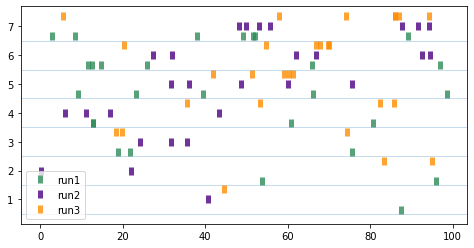

In [182]:
fig = plt.figure(figsize=(8,4))
for i in range(7):
    plt.plot(run1[i]*100,(i+0.65)*np.ones(np.size(run1[i])),'|',markersize='8.5',mew=5,color='seagreen',alpha=0.8)
    plt.plot(run2[i]*100,(i+1)*np.ones(np.size(run1[i])),'|',markersize='8.5',mew=5,color='indigo',alpha=0.8)
    plt.plot(run3[i]*100,(i+1.35)*np.ones(np.size(run1[i])),'|',markersize='8.5',mew=5,color='darkorange',alpha=0.8)
    plt.axhline(i+0.5,alpha=0.5,linewidth=0.5)
#plt.axhline(i+1+0.5,alpha=0.5,linewidth=0.5)

plt.legend(['run1','run2','run3']);
plt.plot()

# MD Hybrid



## DA MD Hybrid hbonds (>25%)

1. :356.A@ND2 | :16.B@O
2. :16.B@N | :356.A@OD1 
3. :13.B@NE | :393.A@OD2
4. :13.B@NH2 | :393.A@OD1
5. :13.B@NH2 | :393.A@OD2
6. :362.A@OH | :17.B@OD2

In [4]:
md_h1 = preprocessing_df(md1_hybrid_hbonds)
md_h2 = preprocessing_df(md2_hybrid_hbonds)
md_h3 = preprocessing_df(md3_hybrid_hbonds)

mdh_da_pairs = [':356.A@ND2 | :16.B@O', ':16.B@N | :356.A@OD1',
                ':13.B@NE | :393.A@OD2', ':13.B@NH2 | :393.A@OD1',
                ':13.B@NH2 | :393.A@OD2',':362.A@OH | :17.B@OD2']

run1_data = get_run_hbond_data(md_h1,mdh_da_pairs)
run2_data = get_run_hbond_data(md_h2,mdh_da_pairs)
run3_data = get_run_hbond_data(md_h3,mdh_da_pairs)

[]

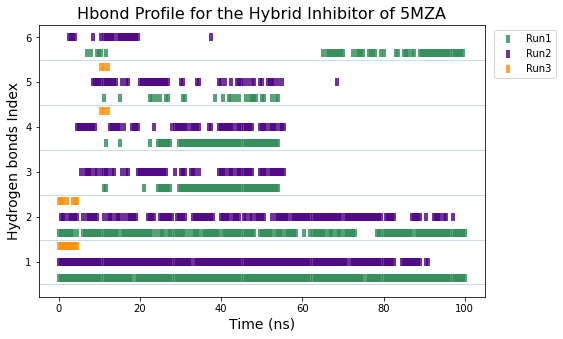

In [5]:
fig = plt.figure(figsize=(8,5))
for i in range(len(run1_data)):
    plt.plot(run1_data[i]*0.5,(i+0.65)*np.ones(np.size(run1_data[i])),'|',markersize='8.5',mew=4,color='seagreen',alpha=0.8)
    plt.plot(run2_data[i]*0.5,(i+1)*np.ones(np.size(run2_data[i])),'|',markersize='8.5',mew=4,color='indigo',alpha=0.8)
    plt.plot(run3_data[i]*0.5,(i+1.35)*np.ones(np.size(run3_data[i])),'|',markersize='8.5',mew=4,color='darkorange',alpha=0.8)
    plt.axhline(i+0.5,alpha=0.5,linewidth=0.5)

plt.legend(['Run1','Run2','Run3'], bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xlabel('Time (ns)',fontsize=14)
plt.ylabel('Hydrogen bonds Index',fontsize=14)
plt.title('Hbond Profile for the Hybrid Inhibitor of 5MZA',fontsize=16)
plt.plot()

# MD 16ile


## DA MD S16I Hbonds (>25%)

1. :356.A@ND2 | :16.B@O
1. :16.B@N | :356.A@OD1     
3. :394.A@OG1 | :13.B@O
4. :10.B@N | :363.A@OD1
5. :363.A@N | :10.B@O
6. :349.A@NZ | :18.B@OC2

In [6]:
md_inh1 = preprocessing_df(md1_16ile_hbonds)
md_inh2 = preprocessing_df(md2_16ile_hbonds)
md_inh3 = preprocessing_df(md3_16ile_hbonds)

In [7]:
md_inh_DA_pairs = [':356.A@ND2 | :16.B@O',':16.B@N | :356.A@OD1',':394.A@OG1 | :13.B@O',
            ':10.B@N | :363.A@OD1',':363.A@N | :10.B@O',':349.A@NZ | :18.B@OC2']
    

ile_run1_data = get_run_hbond_data(md_inh1,md_inh_DA_pairs)
ile_run2_data = get_run_hbond_data(md_inh2,md_inh_DA_pairs)
ile_run3_data = get_run_hbond_data(md_inh3,md_inh_DA_pairs)


[]

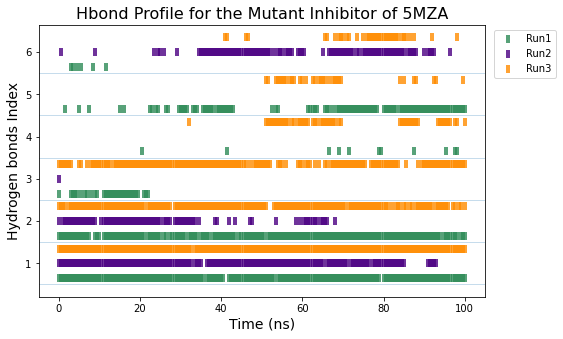

In [8]:
fig = plt.figure(figsize=(8,5))
for i in range(len(ile_run1_data)):
    plt.plot(ile_run1_data[i]*0.5,(i+0.65)*np.ones(np.size(ile_run1_data[i])),'|',markersize='8.5',mew=4,color='seagreen',alpha=0.8)
    plt.plot(ile_run2_data[i]*0.5,(i+1)*np.ones(np.size(ile_run2_data[i])),'|',markersize='8.5',mew=4,color='indigo',alpha=0.8)
    plt.plot(ile_run3_data[i]*0.5,(i+1.35)*np.ones(np.size(ile_run3_data[i])),'|',markersize='8.5',mew=4,color='darkorange',alpha=0.8)
    plt.axhline(i+0.5,alpha=0.5,linewidth=0.5)

plt.legend(['Run1','Run2','Run3'], bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xlabel('Time (ns)',fontsize=14)
plt.ylabel('Hydrogen bonds Index',fontsize=14)
plt.title('Hbond Profile for the Mutant Inhibitor of 5MZA',fontsize=16)
plt.plot()